In [192]:
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import cv2
image_file = "handwritten_sample.jpg"
img = cv2.imread(image_file)



In [193]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

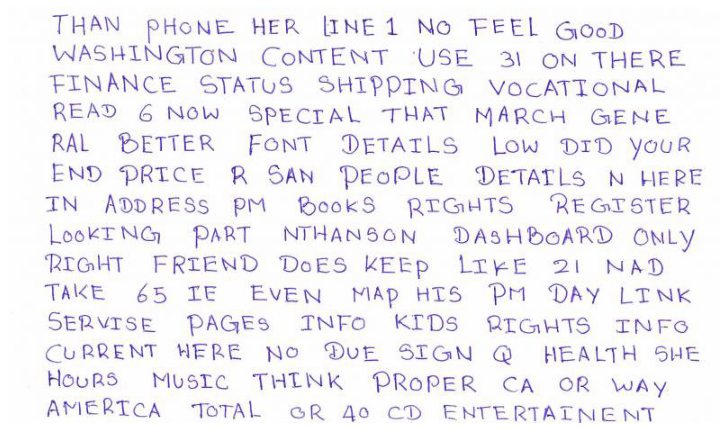

In [194]:
display(image_file)

### Preprocessing for Tesseract

In [195]:
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

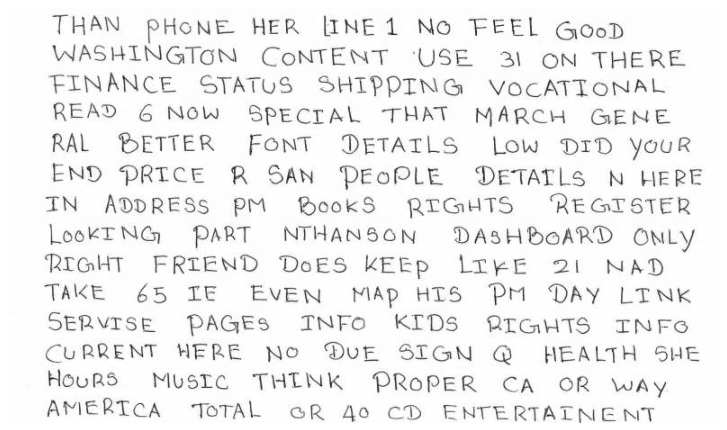

In [197]:

gray_image = get_grayscale(img)
cv2.imwrite("gray.jpg", gray)
display("gray.jpg")

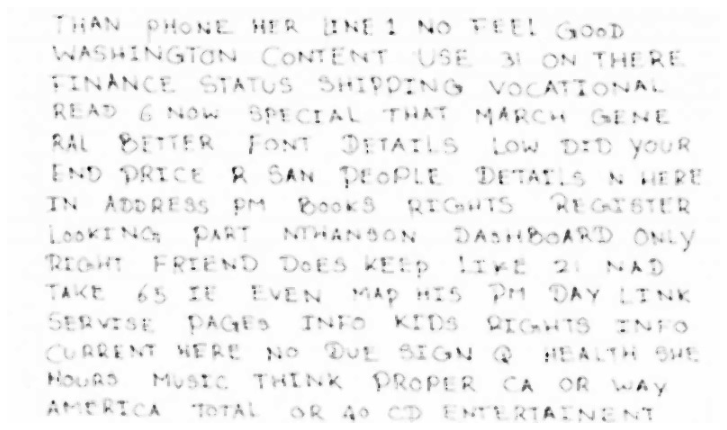

In [198]:
rnoise = remove_noise(gray_image)
cv2.imwrite("rnoise.jpg", rnoise)
display("rnoise.jpg")

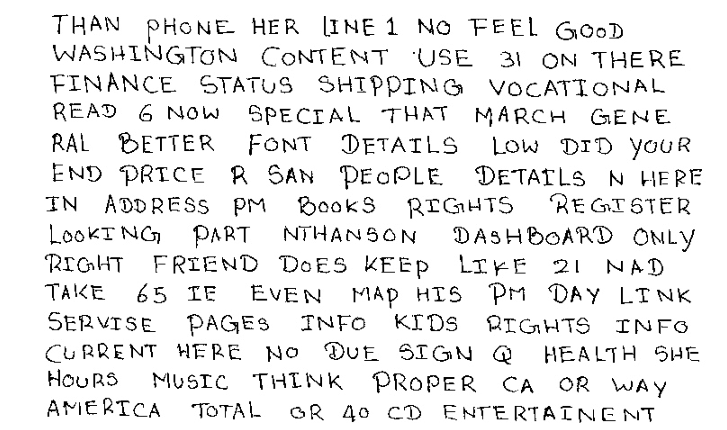

In [200]:
thresh = thresholding(gray_image)
cv2.imwrite("thresh.jpg", thresh)
display("thresh.jpg")

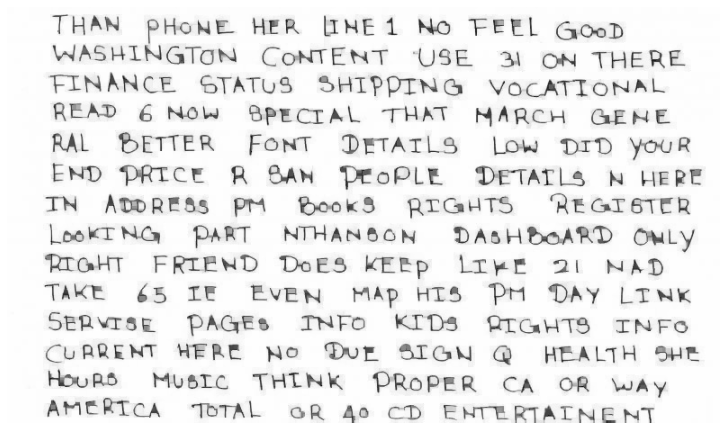

In [201]:
opening = opening(gray)
cv2.imwrite("opening.jpg", opening)
display("opening.jpg")


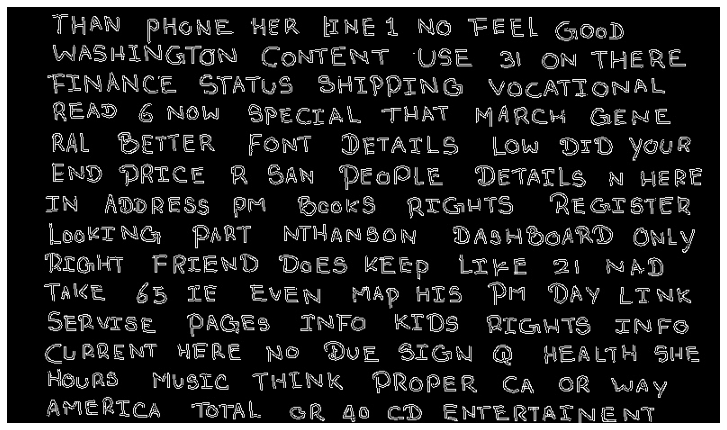

In [202]:
canny = canny(gray)
cv2.imwrite("canny.jpg", canny)
display("canny.jpg")



In [203]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)


'THAN PHONE HER [INE 1 NO FEEL Good\nWASHINGTGN CoNTENT “USE 31 ON THERE\nFINANCE STATUS SHIPPING VOCATIONAL\nREAD G NOW SPECTAL THAT MARCH GENE\nRAL BETTER FONT DETAILS Low DID youR\nEND PRICE R SAN PEOPLE DETATLS N HERE\nIN ADDRESS PM BookS REGHTS REGISTER\nLookKING PART NTHANSON DASHBOARD ONLy\nBIGHT FRIEND DoES KEEp LIKE 21 NAD\nTAKE 65 TE EVEN MAp HTS PM DAY LINK\nSERVISE PAGES INFO KIDS QILGHTS INFS\nCURRENT HERE No DvE SIGN @ HEALTH SHE\nHouRS Musta THINK PROPER CA OR WAy\nAMERTCA TOTAL GR Ao CD ENTERTATNENT\n\x0c'

In [204]:
pytesseract.image_to_string(gray_image, config=custom_config)

'THAN PHONE HER [INE 1 NO FEEL Good\nWASHINGTGN CoNTENT “USE 31 ON THERE\nFINANCE STATUS SHIPPING VocATIONAL\nREAD G6 NoW SPECTAL THAT MARCH GENE\nRAL BETTER FONT DETAILS Low DID youR\nEND PRICE R SAN PEOPLE DETATLS N HERE\nIN ADDRESS PM BookS REGHTS REGTSTER\nLookKING PART NTHANSON DASHBOARD ONLy\nBIGHT FRIEND DoES KEEp LIKE 21 NAD\nTAKE 65 TE EVEN MAp HTS PM DAY LINK\nSERVISE PAGES INFO KIDS QILGHTS INFS\nCURRENT HERE No DvE SIGN @ HEALTH SHE\nHouRS Musta THINK PROPER CA OR WAy\nAMERTCA TOTAL GR Ao CD ENTERTATNENT\n\x0c'

In [205]:
pytesseract.image_to_string(thresh, config=custom_config)

'THAN PHONE HER [INE 1 NO FEEL Good\nWASHINGTON CoNTENT “USE 31 ON THERE\nFINANCE STATUS SHIPPING VocATIONAL\nREAD G@ NOW SPECTAL THAT MARCH GENE\nRAL BETTER FONT DETAILS Low DID your\nEND PRICE R SAN PEOPLE DETATLS N HERE\nIN ADDRESS PM BookS REGHTS REGISTER\nLookING PART NTHANSON DASHBOARD OWLy\nBIGHT FRIEND DoES KEEp LIKE 21 NAD\nTAKE 65 TE EVEN MAp HTS Pm DAY LINK\nSERVISE PAGES INFO KIDS QLGHTS INES\nCURRENT HERE No Dut STGN @ HEALTH SHE\nHouRS MusTc THINK PROPER CA OR Way\nAMERTCA ‘TOTAL @R Ao cD ENTERTATNENT\n\x0c'

In [206]:
pytesseract.image_to_string(canny, config=custom_config)

'THAN PHONE HER ENE L No FEEL Goop\nWASHINGTON CoNnTENT USE 3) ON THERE\nFINANCE GTATUS SHIPPING VOCATIONAL\nREAD G NOW SPECTAL THAT MARCH GENE\nRAL BETTER FONT DETALLS Low DrD youR\nEND PRICE R SAN PEGPLE Detarls n weee\nIN ADDRESS PM BeckS QIGHTS REGTSTER\nLeokKING PART NTHANSON DASHBOARD Owly\nRIGHT FRIEND DeES KEEP LEeKE 21 NAD\nTake 65 LE EvEN Map RIS PM DAY LINK\nSERvrse PAGES INFO KIDS REGWIS INFO\nCURRENT HFRE NO DvE SIGN @ WEALTH Sue\nHouRS Music THINK PROPER CA OR way\nAMERTCA TeTAL @R 40 CD ENTERTATNE NY\n\x0c'

In [108]:
pytesseract.image_to_string(opening, config=custom_config)

'THAN PHONE HER [NE 1 NO FEEL Good\nWASHINGTON CoNTENT “USE 31 ON THERE\nFINANCE STATUS SHIPPING VOCATIONAL\nREAD 6 NOW SBPECTAL THAT NARCH GENE\nRAL BETTER FONT DETATLS Low DID youR\nEND PRICE R BAN POPLE DETATLS N HERE\nIN ADDRESS PM BookS RIGHTS REGISTER\nLookKING, PART NTHAN6SON DASHBOARD OWLy\nPIGHT FRIEND DoES KEEp LIKE 21 NAD\nTAKE 65 TE EVEN MAp HTS PM DAY LTNK\nSeRvrse PAGES INFO KIDS OLGHTS INFO\nCURRENT HERE No Dur SIGN @ HEALTH SHE\nHouRS MustG THINK PROPER CA OR WaAy\nAMCRICA TOTAL GR Ao CD ENTERTATNENT\n\x0c'

In [215]:
pytesseract.image_to_string(rnoise, config=custom_config)

'THAN PHONE HER ENE 1 NO FEEL Goon\nWASHINGTON CONTENT USE 3: ON THERE\nFINANCE STATUS SHIPOTING VOCATIONAL\nREAD G NOW SPECTAL THAT MARCH GENE\nRAL BETTER FONT DETATLS Low DrD your\nEND PRICE R SAN PECPLE DETATLS N HERE\nIN ADDRESS PM BeookS QTGHTS “REGTSTER\nLooKE NG, PART NTHANSON DASHBOARD Only\nRIGHT FRIEND DeES KEtpD Siete 2 NAD\nTaKkt 65 Fe EVEN “MAD HIS Prt DAY LINK\nSER vrse PAGES INKFo KIDS Orcawts INFO\nCURRENT WERE No Dut SIGN @ HEALTH Sue\nHouRS Mustc THINK PROPER CA OR Way\nAMCRICA TOTAL OR AO CD ENTERTIAINEANT\n\x0c'